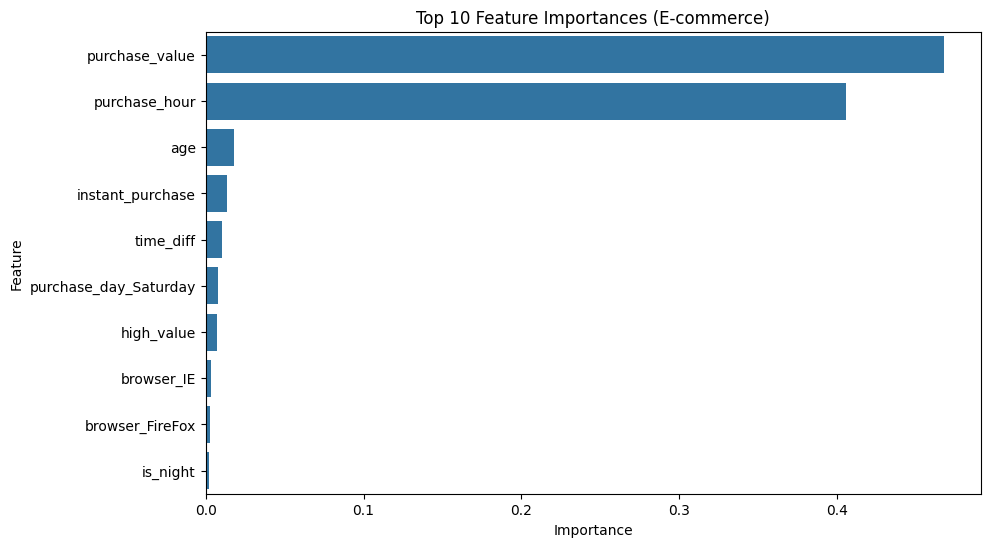

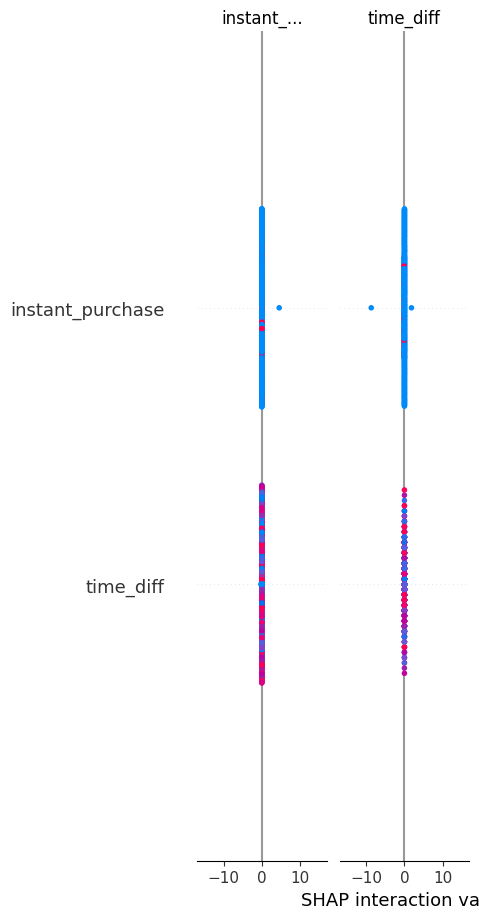

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [1]:
# -----------------------------
# 0️⃣ Setup
# -----------------------------
import os
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1️⃣ Root directory
# -----------------------------
root_dir = "C:/Users/derej/Desktop/Kifya/fraud_detection/"

# -----------------------------
# 2️⃣ Load processed data
# -----------------------------
ecom_path = os.path.join(root_dir, "data/processed/fraud_data_final.csv")
ecom_data = pd.read_csv(ecom_path)

# Separate features & target
target_col = "class"
ecom_X = ecom_data.drop(columns=[target_col, "user_id"])
ecom_y = ecom_data[target_col]

# -----------------------------
# 3️⃣ Load saved model
# -----------------------------
ecom_model_path = os.path.join(root_dir, "models/ecommerce_best_model.pkl")
ecom_model = joblib.load(ecom_model_path)

# -----------------------------
# 4️⃣ Align features
# -----------------------------
if hasattr(ecom_model, "feature_names_in_"):
    model_features = list(ecom_model.feature_names_in_)
else:
    model_features = list(range(len(ecom_model.feature_importances_)))

aligned_cols = [c for c in ecom_X.columns if c in model_features]
ecom_X_aligned = ecom_X[aligned_cols].copy()

# -----------------------------
# 5️⃣ Reduce features if >50
# -----------------------------
max_features = 50
if ecom_X_aligned.shape[1] > max_features:
    tmp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    tmp_rf.fit(ecom_X_aligned, ecom_y)
    top_feats = pd.Series(tmp_rf.feature_importances_, index=ecom_X_aligned.columns)\
                 .sort_values(ascending=False).head(max_features).index
    ecom_X_aligned = ecom_X_aligned[top_feats]

# -----------------------------
# 6️⃣ Convert to float32
# -----------------------------
ecom_X_aligned = ecom_X_aligned.astype("float32")

# -----------------------------
# 7️⃣ Lightweight SHAP Explainer
# -----------------------------
# Use a small sample for SHAP
shap_sample_size = min(500, len(ecom_X_aligned))
ecom_sample = ecom_X_aligned.sample(n=shap_sample_size, random_state=42)
y_sample = ecom_y.loc[ecom_sample.index]

# Use a small background
background = ecom_sample.sample(n=50, random_state=42)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(
    ecom_model,
    data=background,
    model_output="probability"  # more stable than raw
)

shap_values = explainer.shap_values(ecom_sample)

# -----------------------------
# 8️⃣ Feature Importance Plot
# -----------------------------
feat_imp_ecom = pd.DataFrame({
    "Feature": ecom_X_aligned.columns,
    "Importance": ecom_model.feature_importances_[:len(ecom_X_aligned.columns)]
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_ecom.head(10), x="Importance", y="Feature")
plt.title("Top 10 Feature Importances (E-commerce)")
plt.show()

# -----------------------------
# 9️⃣ SHAP Summary Plot (lightweight)
# -----------------------------
shap.summary_plot(shap_values, ecom_sample, max_display=10)  # only top 10 features

# -----------------------------
# 🔟 SHAP Force Plot for 1 example
# -----------------------------
shap.initjs()
example_idx = 0
# Use shap.force_plot with numpy array for one sample
shap.force_plot(
    explainer.expected_value,
    shap_values[example_idx],
    ecom_sample.iloc[example_idx,:]
)


Credit Card data loaded
Total features: 30 Total rows: 283726
Model loaded


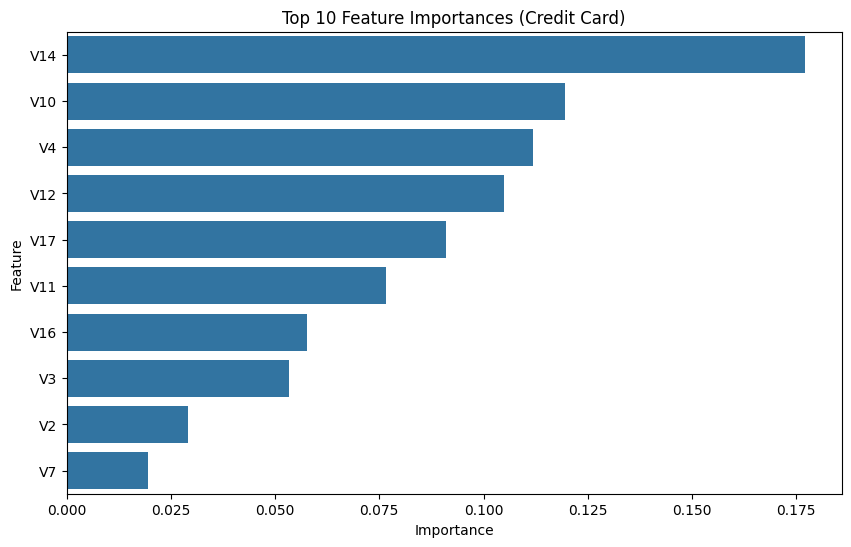

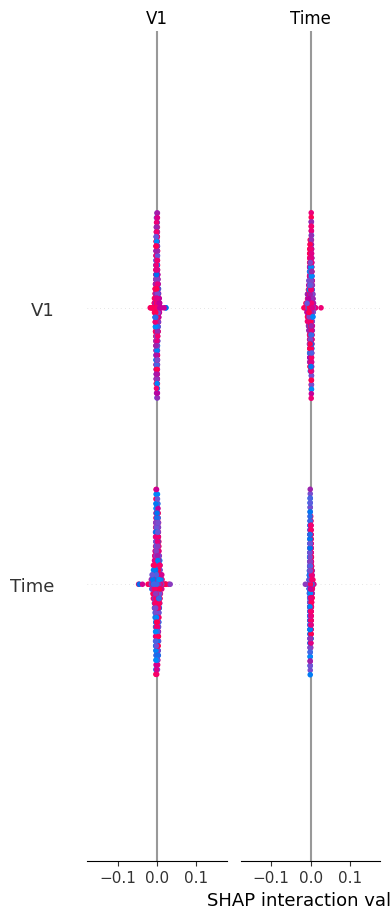

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [4]:
# -----------------------------
# 0️⃣ Setup
# -----------------------------
import os
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1️⃣ Root directory
# -----------------------------
root_dir = "C:/Users/derej/Desktop/Kifya/fraud_detection/"

# -----------------------------
# 2️⃣ Load processed data
# -----------------------------
cc_path = os.path.join(root_dir, "data/processed/creditcard_final.csv")  # your CC data
cc_data = pd.read_csv(cc_path)

# Separate features & target
target_col = "Class"  # adjust if different
cc_X = cc_data.drop(columns=[target_col])
cc_y = cc_data[target_col]

print("Credit Card data loaded")
print("Total features:", cc_X.shape[1], "Total rows:", cc_X.shape[0])

# -----------------------------
# 3️⃣ Load saved RF model
# -----------------------------
cc_model_path = os.path.join(root_dir, "models/creditcard_best_model.pkl")
cc_model = joblib.load(cc_model_path)
print("Model loaded")

# -----------------------------
# 4️⃣ Align features
# -----------------------------
if hasattr(cc_model, "feature_names_in_"):
    model_features = list(cc_model.feature_names_in_)
else:
    model_features = list(range(len(cc_model.feature_importances_)))

aligned_cols = [c for c in cc_X.columns if c in model_features]
cc_X_aligned = cc_X[aligned_cols].copy()

# -----------------------------
# 5️⃣ Keep numeric only
# -----------------------------
numeric_cols = cc_X_aligned.select_dtypes(include=[np.number]).columns
cc_X_aligned = cc_X_aligned[numeric_cols]

# -----------------------------
# 6️⃣ Reduce features if too many
# -----------------------------
max_features = 50
if cc_X_aligned.shape[1] > max_features:
    tmp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    tmp_rf.fit(cc_X_aligned, cc_y)
    top_feats = pd.Series(tmp_rf.feature_importances_, index=cc_X_aligned.columns)\
                 .sort_values(ascending=False).head(max_features).index
    cc_X_aligned = cc_X_aligned[top_feats]
    print(f"Reduced features to top {max_features}")

# -----------------------------
# 7️⃣ Convert to float32
# -----------------------------
cc_X_aligned = cc_X_aligned.astype("float32")

# -----------------------------
# 8️⃣ Lightweight SHAP Explainer
# -----------------------------
# small sample for stability
shap_sample_size = min(500, len(cc_X_aligned))
cc_sample = cc_X_aligned.sample(n=shap_sample_size, random_state=42)
y_sample = cc_y.loc[cc_sample.index]

# small background
background = cc_sample.sample(n=50, random_state=42)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(
    cc_model,
    data=background,
    feature_perturbation="interventional",
    model_output="raw"
)

# Compute SHAP values safely
shap_values = explainer.shap_values(cc_sample, check_additivity=False)

# -----------------------------
# 9️⃣ Feature Importance Plot
# -----------------------------
feat_imp_cc = pd.DataFrame({
    "Feature": cc_X_aligned.columns,
    "Importance": cc_model.feature_importances_[:len(cc_X_aligned.columns)]
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_cc.head(10), x="Importance", y="Feature")
plt.title("Top 10 Feature Importances (Credit Card)")
plt.show()

# -----------------------------
# 🔟 SHAP Summary Plot (lightweight)
# -----------------------------
shap.summary_plot(shap_values, cc_sample, max_display=10)

# -----------------------------
# Optional SHAP Force Plot (for 1 example)
# Skip if features >30 to prevent kernel crash
# -----------------------------
shap.initjs()
if cc_X_aligned.shape[1] <= 30:
    example_idx = 0
    shap.force_plot(
        explainer.expected_value,
        shap_values[example_idx],
        cc_sample.iloc[example_idx,:]
    )
else:
    print("Feature count > 30 → skipping force plot to prevent kernel crash.")
